# Continut
## [0. Importul bibliotecilor](#0)
## [1. Implementarea regresiei liniare simple cu instrumente Python](#1)
## [2. Implementarea regresiei liniare simple cu instrumente Scikit-Learn](#2)
## [3. Implementarea regresiei liniare multiple cu instrumente Scikit-Learn](#3)
## [4. Implementarea regresiei polinomiale cu instrumente Scikit-Learn](#S4)
### [4.1. Implementarea PolynomialFeatures](#41)
### [4.2. Predictia cu LinearRegression](#42)
### [4.3. Gradul optimal al polinomului](#43)
## [5. Regularizarea](#5)
### [5.1. Scalarea datelor - standardizarea](#51)
### [5.2. Regresie L2 - Ridge](#52)
#### [5.2.1. Algoritmul Ridge cu parametrul alpha fix](#521)
#### [5.2.2. Algoritmul Ridge cu parametrul alpha reglabil](#522)
### [5.3. Regresie L1 - Lasso](#53)
#### [5.3.1. Algoritmul Lasso cu parametrul alpha fix](#531)
#### [5.3.2. Algoritmul Lasso cu parametrul alpha reglabil](#532)
### [5.4. Regresie L1+L2 - ElasticNet](#54)
#### [5.4.1. Algoritmul Lasso cu parametrii alpha si l1_ratio ficsi](#541)
#### [5.4.2. Algoritmul Lasso cu parametrii alpha si l1_ratio reglabili](#542)


<a id='0'></a>
# 0. Importul bibliotecilor

In [1]:
# importul bibliotecilor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1'></a>
# 1. Implementarea regresiei liniare simple cu instrumente Python

In [2]:
# Importul fisierului cu date 'dvertising.csv' descarcat de pe https://www.kaggle.com/bumba5341/advertisingcsv
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# stergerea coloanei 'Unnamed: 0'
df=df.drop('Unnamed: 0', axis = 1)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# crearea unei noi coloane "Total_spend" care va fi suma primelor 3 coloane
df['Total_spend'] = df['TV']+df['Radio']+df['Newspaper']

In [7]:
df.head()

,TV,Radio,Newspaper,Sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_spend', ylabel='Sales'>

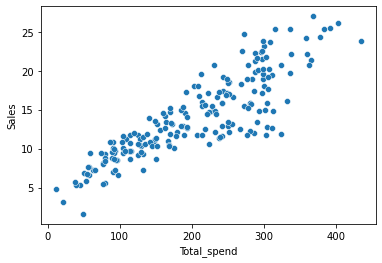

In [8]:
# afisarea depdepndentei dintre Sales si Total_spend
sns.scatterplot(data=df, y='Sales', x='Total_spend')

<AxesSubplot:xlabel='Total_spend', ylabel='Sales'>

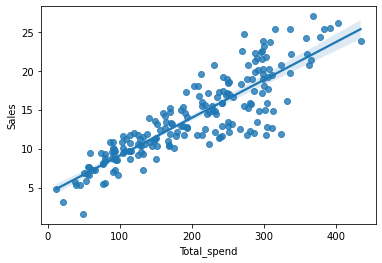

In [9]:
# afisarea depdepndentei dintre Sales si Total_spend si trasare liniei regresiei
sns.regplot(data=df, y='Sales', x='Total_spend')

In [10]:
# separarea in X si y
X=df['Total_spend']
y=df['Sales']

In [11]:
#Determinarea coeficientilor B1 si B0 din relatia y=B1X+B0 cu ajutorul functiei polyfit() considerand parametrul deg=1
B1, B0 = np.polyfit(X,y,deg=1)
B1, B0

(0.04868787931904818, 4.243028216036327)

In [12]:
# crearea unei serii de valori a posibilelor cheltuieli
spend=np.linspace(0,500,100)
spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [13]:
# prezictia vanzarilor pentru posibilele cheltuieli
predict_sales = B1*spend+B0
predict_sales

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

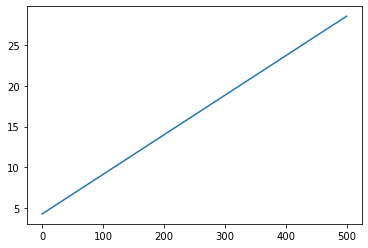

In [14]:
# Afisarea liniara a depdendentei dintre spend si predict_sales
plt.plot(spend, predict_sales)

In [15]:
# reliazarea unei predictii
spend=300
sales=B1*spend+B0
sales

18.84939201175078

<a id='2'></a>
# 2. Implementarea regresiei liniare simple cu instrumente Scikit-Learn

In [16]:
df.head()

,TV,Radio,Newspaper,Sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [17]:
# separarea in X si y
X = df.drop(['TV', 'Radio', 'Newspaper','Sales'], axis=1)
y = df['Sales']
X

,Total_spend
0,337.1
1,128.9
2,132.4
3,251.3
4,250.0
...,...
195,55.7
196,107.2
197,192.7
198,391.8


In [18]:
#crearea setului de training si a setului de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

In [19]:
# inportul clasei modelului regresiei liniare si crearea unei instante a acestuia
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# realizarea trainingului modelului pe datele de training
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# vizualizarea coeficientului panta (slope)
B1=model.coef_
B1

array([0.04948923])

In [22]:
# vizualizarea coeficientului intercept
B0 = model.intercept_
B0

4.087945279716477

In [23]:
# realizarea predictiei
y_pred = model.predict(X_test)
y_pred

array([18.45466766,  7.89366678, 19.30093343, 18.3309446 , 13.38697089,
        9.20018235, 18.82088794, 12.9514657 , 12.50606267, 18.31609783,
       15.12404274, 25.54647379,  8.7300347 , 16.52458784, 17.77171634,
       17.93008187, 14.36685758, 15.91092143, 12.4912159 , 18.33589352,
       19.48404357,  9.39319034,  8.36381443, 17.51932129, 23.47782413,
       22.73548574, 10.4572087 , 12.4466756 , 12.16458701, 18.90996855,
       15.15373627, 10.29389425,  9.22492697, 22.12181933,  9.27936511,
       11.07087511, 13.23355429, 12.90197648,  8.74488147,  9.64558539,
       16.76213613, 18.99904915, 11.57071629, 19.34547374, 17.25207947,
       18.87532609, 12.20417839, 11.51132922, 13.62451918, 18.92976424,
        6.77026134, 18.23691507, 15.53975224,  7.90356462, 16.35137555,
       16.00989989,  6.70592535, 18.73675625,  9.70992138,  9.71981923])

In [24]:
# vizualizarea datelor de test
np.array(y_test)

array([21.7,  8.1, 20.2, 19.8, 15.3, 10.9, 21.5, 12.2, 15.2, 21.2, 14.7,
       23.8,  7.3, 18.5, 11.7, 15.9, 18. , 11.5, 14.7, 22.3, 12.7,  9.7,
       10.8, 15.5, 25.5, 24.4,  9.6, 11.9, 14.2, 18. , 10.6, 11.8, 11.6,
       21.4, 10.1, 10.8, 15. , 11.6,  8.5,  9.7, 13.2, 15. , 10.3, 23.7,
       12.5, 18.9, 13.4,  8.7, 12.8, 23.2,  6.7, 12. , 12.2,  8. , 16.9,
       15.9,  5.9, 22.4, 10.7, 11.8])

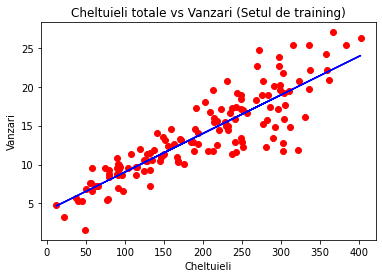

In [25]:
#afisarea grafica a datelor de training si a linie de predictie
plt.scatter(X_train, y_train, color = 'red')
plt.plot(np.array(X_train), model.predict(X_train), color = 'blue')
plt.title('Cheltuieli totale vs Vanzari (Setul de training)')
plt.xlabel('Cheltuieli')
plt.ylabel('Vanzari');

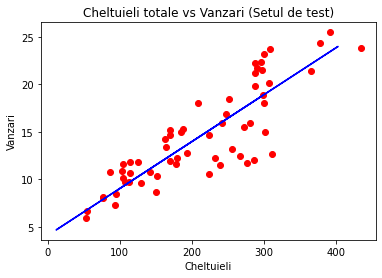

In [26]:
#afisarea grafica a datelor de teste si a linie de predictie
plt.scatter(X_test, y_test, color = 'red')
plt.plot(np.array(X_train), model.predict(X_train), color = 'blue')
plt.title('Cheltuieli totale vs Vanzari (Setul de test)')
plt.xlabel('Cheltuieli')
plt.ylabel('Vanzari');

In [27]:
# importul instrinmentelor de evaluare
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
# determinarea erorii medii absolute, erorii medii patartice ai a patratului erorii medii patratice
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE)

2.0756741686077005 7.007533107277554 2.6471745517206746


In [29]:
# realizarea unei predictii proprii
date_proprii=300
model.predict([[date_proprii]])

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.93471316])

**Nota:** Datele proprii de predictie (date_proprii) au fost incluse ]n paranteze patratice duble deoarece metoda "predict" intodeauna accepta date de intrare sub forma sitrurilor 2D. Pur si simplu:

date_proprii -> numar scalar

[date_proprii] -> sir 1D

[[date_proprii]] -> sir 2D

<a id='3'></a>
# 3. Implementarea regresiei liniare multiple cu instrumente Scikit-Learn

In [30]:
# steregera coloanei Total_spend
df = df.drop('Total_spend', axis=1)

In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


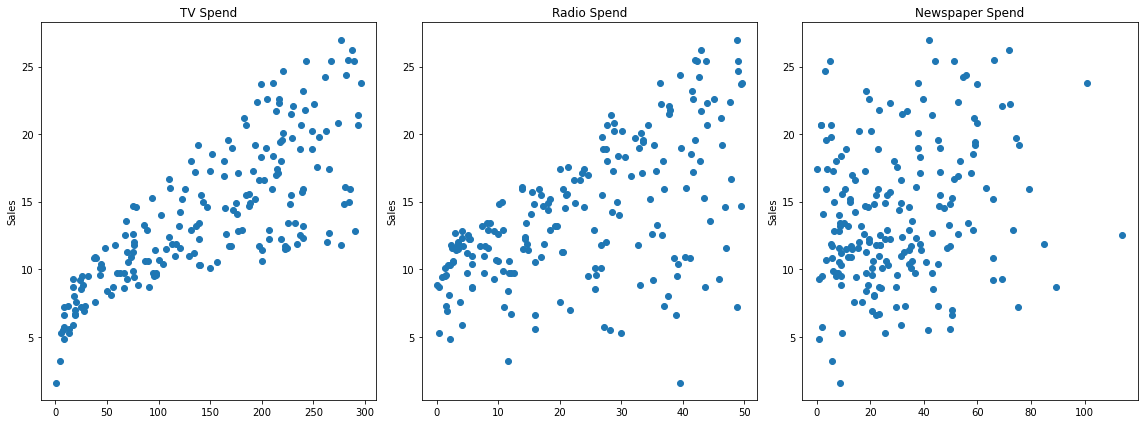

In [32]:
# izualizarea dependentelor vanzarilor de fiecare tip de cheltuieli
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'],  "o")
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], "o")
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'], "o")
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

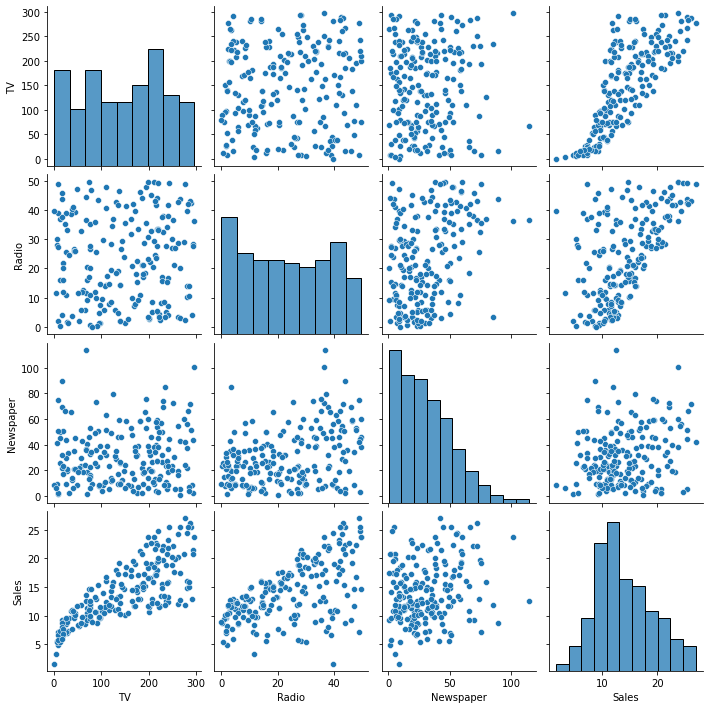

In [33]:
#vizualizarea depdendentelor intre toate coloanele din data set
sns.pairplot(df)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

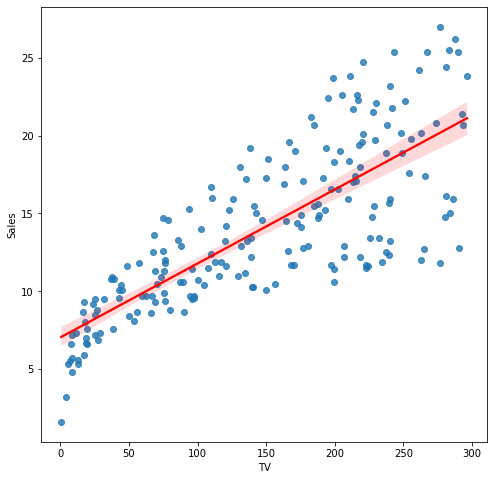

In [34]:
# Crearea liniei modelulii de regresie vanzarilor de Tv cu instrumente sns
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='TV', y="Sales", line_kws={'color': 'red'})

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

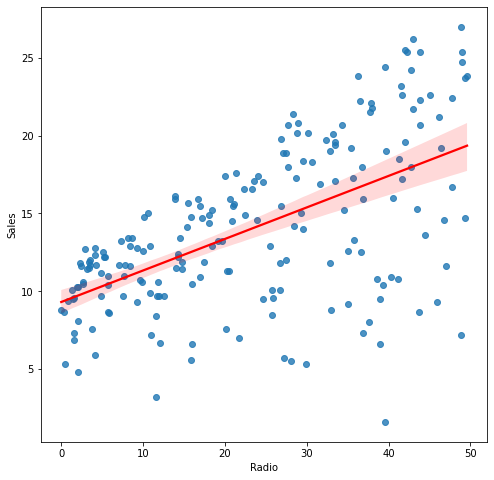

In [35]:
# Crearea liniei modelulii de regresie vanzarilor de Radio cu instrumente sns
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='Radio', y="Sales", line_kws={'color': 'red'})

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

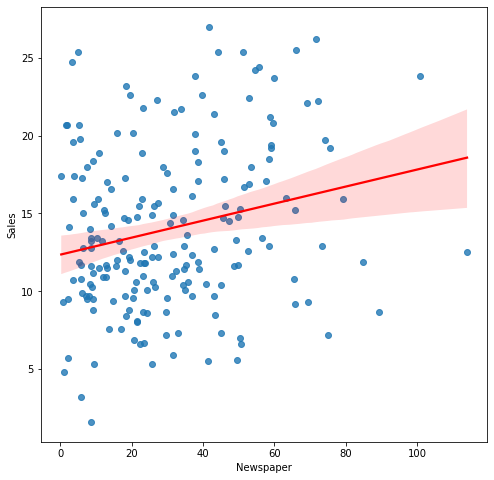

In [36]:
# Crearea liniei modelulii de regresie vanzarilor de Tv cu instrumente sns
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='Newspaper', y="Sales", line_kws={'color': 'red'})

In [37]:
# crearea setului X
X=df.drop('Sales', axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
#crearea setului y 
y = df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [39]:
#formarea setulrilor de train si de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [40]:
#importul clasei modelului LinearRegression si crearea unei instante a acesteai
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
#trainingul modelului pe datele de train
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# vizualizarea coeficientilor
Bn=model.coef_
Bn

array([ 0.04636712,  0.18249225, -0.00196151])

In [43]:
# vizualizarea coeficientului intercept
B0 = model.intercept_
B0

3.0762941463550604

In [44]:
# realizarea predictiei de datele de test
predictii = model.predict(X_test)

In [45]:
predictii

array([20.75654125,  5.87994308, 20.48152463, 19.81670913, 15.26952282,
        9.55670526, 20.46518628, 12.09002135, 15.0739953 , 19.85893084,
       14.89243115, 23.2460598 , 10.26409293, 17.52309377, 14.0753745 ,
       17.21174101, 17.35851736, 13.98311898, 15.46539367, 21.08674174,
       15.81773629,  8.3224004 , 12.39684982, 16.69463448, 23.76083097,
       23.24124165,  7.798071  , 11.41079245, 13.83670737, 18.15316313,
       12.77334007, 11.44754318, 13.87628862, 21.73701618,  9.8784108 ,
       11.70276627, 15.02446303, 10.12412462,  8.84522603,  8.96990632,
       15.52416738, 18.18032988,  9.91068244, 21.19614008, 14.96846284,
       19.51305429, 12.1613638 , 11.65945037, 12.96789821, 21.73690593,
        6.10561603, 15.8666828 , 13.57592046, 10.72560532, 16.31103545,
       16.53319413,  4.56004299, 20.73754509,  9.47641689, 11.68205354])

In [46]:
# datele de test reale
np.array(y_test)

array([21.7,  8.1, 20.2, 19.8, 15.3, 10.9, 21.5, 12.2, 15.2, 21.2, 14.7,
       23.8,  7.3, 18.5, 11.7, 15.9, 18. , 11.5, 14.7, 22.3, 12.7,  9.7,
       10.8, 15.5, 25.5, 24.4,  9.6, 11.9, 14.2, 18. , 10.6, 11.8, 11.6,
       21.4, 10.1, 10.8, 15. , 11.6,  8.5,  9.7, 13.2, 15. , 10.3, 23.7,
       12.5, 18.9, 13.4,  8.7, 12.8, 23.2,  6.7, 12. , 12.2,  8. , 16.9,
       15.9,  5.9, 22.4, 10.7, 11.8])

In [47]:
# importul instrumentelor de evaluarea si determinarea erorii medii absolute
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictii)

1.2365590958928117

In [48]:
df['Sales'].mean()

14.022500000000003

In [49]:
# determinarea erorii medii patratice
mean_squared_error(y_test, predictii)

2.440630076088538

In [50]:
# determinarea radacinii erorii medii patratice
np.sqrt(mean_squared_error(y_test, predictii))

1.562251604604245

In [51]:
# determinarea erorii reziduale
er_rezidual = y_test - predictii

In [52]:
np.array(er_rezidual)

array([ 0.94345875,  2.22005692, -0.28152463, -0.01670913,  0.03047718,
        1.34329474,  1.03481372,  0.10997865,  0.1260047 ,  1.34106916,
       -0.19243115,  0.5539402 , -2.96409293,  0.97690623, -2.3753745 ,
       -1.31174101,  0.64148264, -2.48311898, -0.76539367,  1.21325826,
       -3.11773629,  1.3775996 , -1.59684982, -1.19463448,  1.73916903,
        1.15875835,  1.801929  ,  0.48920755,  0.36329263, -0.15316313,
       -2.17334007,  0.35245682, -2.27628862, -0.33701618,  0.2215892 ,
       -0.90276627, -0.02446303,  1.47587538, -0.34522603,  0.73009368,
       -2.32416738, -3.18032988,  0.38931756,  2.50385992, -2.46846284,
       -0.61305429,  1.2386362 , -2.95945037, -0.16789821,  1.46309407,
        0.59438397, -3.8666828 , -1.37592046, -2.72560532,  0.58896455,
       -0.63319413,  1.33995701,  1.66245491,  1.22358311,  0.11794646])

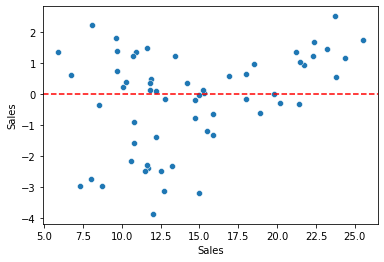

In [53]:
# afisarea erorii reziduale in functie de valorea de test reala
sns.scatterplot(x=y_test, y = er_rezidual)
plt.axhline(y=0, color ='r', ls = '--')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

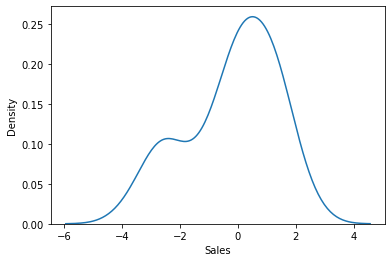

In [54]:
# vizualizarea distributiei erorii reziduale
sns.kdeplot(er_rezidual)

In [55]:
# crearea modelului fina
final_model = LinearRegression()

In [56]:
# trainingul modelul;ui final pe intreg setul de date
final_model.fit(X,y)

LinearRegression()

In [57]:
# vizualizarea valorilor coeficientilor
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [58]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [59]:
# predictia pe intreg setul de date
y_pred = final_model.predict(X)

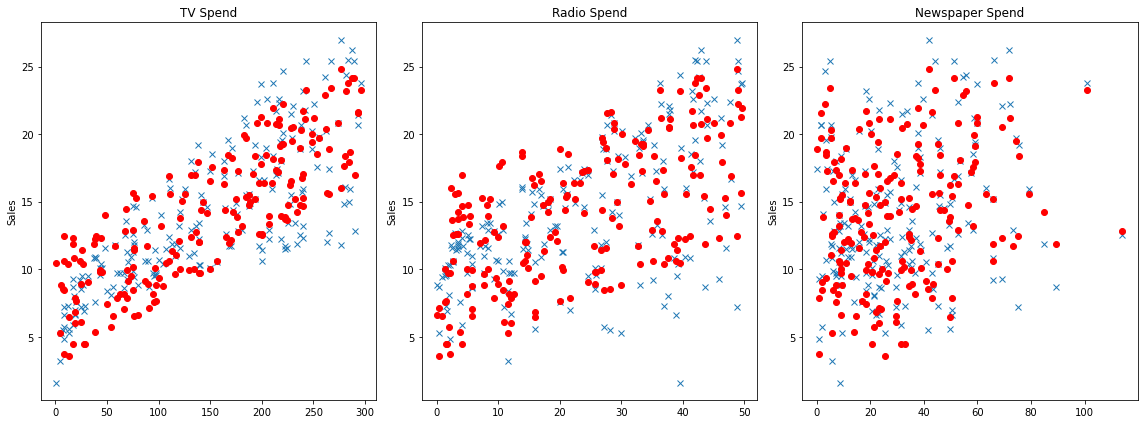

In [60]:
# afiisarea valorilor prezise si celor reale pentru fiecare dintre caracteristicle de intrare
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'],  "x")
axes[0].plot(df['TV'], y_pred,  "o", color="red")
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], "x")
axes[1].plot(df['Radio'], y_pred,  "o", color="red")
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'], "x")
axes[2].plot(df['Newspaper'], y_pred,  "o", color="red")
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

In [61]:
# importul instrumentelor de export a modelului
from joblib import dump, load

In [62]:
# exportul modelului
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [63]:
# reincarcarea modelului
loaded_model = load('final_sales_model.joblib')

In [64]:
# reincarcare modelului exportat
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [65]:
# vizualizarea formei setului de intrare
X.shape

(200, 3)

In [66]:
# definirea datelor proprii de predictie
date_proprii = [[23, 56, 41]]

In [67]:
# predictia pe propriile date
loaded_model.predict(date_proprii)

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.50661995])

<a id='4'></a>
# 4. Implementarea regresiei polinomiale cu instrumente Scikit-Learn


<a id='41'></a>
## 4.1. Implementarea PolynomialFeatures

In [68]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Din Preprocessing se importa PolynomialFeatures - un tranformator ce va permite conversia setului de date oribinale prin adaugarea unor caracteristici polinomiale**

Astfel ecutia de forma (se considera doar o singura caracteristica x):

$$\hat{y} = \beta_0 + \beta_1x_1 $$

se va transforma intr-o ecuatia care pe langa caracteristicile originale mai contine si unele carcteristici pana la un ordin *d* al polinomului.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1$$

Se poate aplica modelul linear regression asupra acestui set deaorece noile caracteristici polinomiale x^2, x^3, ... x^d se vor trata ca niste caracteristici noi indepdendente. Evident este necesara selectarea unei valor corecte pentru ordinul *d*.

***Nota:* in cazul mai multor caracteristici x, convertornul nu doar adauga caracteristicile cu ordinul corespunzatoar, dar realizeaza si *interactiunea caracteristicilor* prin inmultirea intre acestea, adica daca caracteristicile de intrarea sunt  [a, b], atunci la ie;irea convertorului de ordinul doi se vor forma caracteristicile [1, a, b, a^2, ab, b^2].**

In [69]:
# importul clasei convertorului polinomial
from sklearn.preprocessing import PolynomialFeatures

In [70]:
# crearea unei instante a acestei clase
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [71]:
# trainingul convetorului si aplicarea acestui asupra setului X 
poly_features = polynomial_converter.fit_transform(X)
poly_features 

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [72]:
# vizualizarea formei noului set de date
poly_features.shape

(200, 9)

In [73]:
# vizualizarea primei linii din noul set de date
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

<a id='42'></a>
## 4.2. Predictia cu LinearRegression

In [74]:
# se creaza setul de training si cel de test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9)

In [75]:
#se creaza un model LinearRegression
model=LinearRegression()

In [76]:
# se realizeaza trainingul modelulu pe setul de train
model.fit(X_train,y_train)

LinearRegression()

In [77]:
# se realizeza predictia pe setul de test
pred= model.predict(X_test)

In [78]:
model.coef_

array([ 5.51341711e-02,  1.13132352e-02,  1.18569635e-02, -1.20434249e-04,
        1.13976017e-03, -7.30912257e-05,  1.43853387e-04,  1.20745388e-04,
       -1.72264442e-05])

In [79]:
# se determina eroarea medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [80]:
# se determina eroarea medie patratica
MSE = mean_squared_error(y_test, pred)

In [81]:
# se determina radacina erorii medii patratice
RMSE =np.sqrt(MSE)

In [82]:
MAE, RMSE

(0.432770103859018, 0.5386442235504029)

<a id='43'></a>
## 4.3. Gradul optimal al polinomului

In [83]:
# se creaza o bucla in care se vor utiliza mai multe valori pentru ordinul polinomului si se vor apluica aceste convertoare
# pentru determinarea RMSE pe datele de train si pe cele de test
train_rmse = []
test_rmse = []

for d in range(1,6):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    test_pred= model.predict(X_test)
    train_pred= model.predict(X_train)
    
    RMSE_train =np.sqrt(mean_squared_error(y_train, train_pred))
    train_rmse.append(RMSE_train)
    
    RMSE_test =np.sqrt(mean_squared_error(y_test, test_pred))
    test_rmse.append(RMSE_test)

In [84]:
train_rmse

[1.7183584382812498,
 0.6447129401269113,
 0.4854288800526523,
 0.369165600368289,
 0.25590620856329077]

In [85]:
test_rmse

[1.5622516046042438,
 0.5386442235504029,
 0.47950059188549266,
 0.5102202145665448,
 0.5961930870305796]

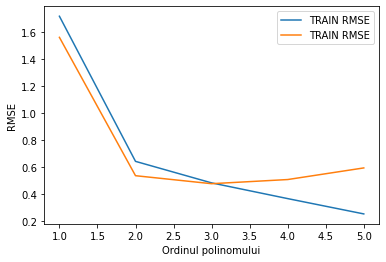

In [86]:
# afisare depedentei RMSE de ordinul polinomului
plt.plot(range(1,6), train_rmse, label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse, label='TRAIN RMSE')
plt.ylabel('RMSE')
plt.xlabel('Ordinul polinomului')
plt.legend()

Se selecteaza ordinul oplinomului 3 intrucat sigura cea mai mica eroare si cea mai mica complexitate 

In [87]:
# se creaza un convertor final cu ordinul polinomului 3
final_poly_corverter = PolynomialFeatures(degree=3, include_bias=False)

In [88]:
# se realizeza trainingul convertorului pe intreg set de date si se aplica acesta aupra datelor
full_converted_X = final_poly_corverter.fit_transform(X)

In [89]:
# se creaza un model final
final_model=LinearRegression()

In [90]:
# Se realizeza trainingul modelului pe intregul set de date convertit
final_model.fit(full_converted_X,y)

LinearRegression()

In [91]:
# se vizualizeza coeificientii beta
final_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [92]:
# se vizualizeza coeficientul intercept
final_model.intercept_

3.9435738172933608

In [93]:
# se salveaza modelul
dump(final_model, "final_poly_model.joblib")

['final_poly_model.joblib']

In [94]:
# se salveaza convertorul
dump(final_poly_corverter, "final_converter.joblib")

['final_converter.joblib']

In [95]:
# se incarca modelul salvat
loaded_converter = load("final_converter.joblib")

In [96]:
# se incarca convertorul salvat
loaded_model = load('final_poly_model.joblib')

In [97]:
# se stabilesc datele propri
date_proprii = [[23, 56, 41]]

In [98]:
# se transforma datele proprii cu convertorul incarcat
date_proprii_transform = loaded_converter.fit_transform(date_proprii)

In [99]:
# se vizualizeaza datele proprii transformate
date_proprii_transform

array([[2.30000e+01, 5.60000e+01, 4.10000e+01, 5.29000e+02, 1.28800e+03,
        9.43000e+02, 3.13600e+03, 2.29600e+03, 1.68100e+03, 1.21670e+04,
        2.96240e+04, 2.16890e+04, 7.21280e+04, 5.28080e+04, 3.86630e+04,
        1.75616e+05, 1.28576e+05, 9.41360e+04, 6.89210e+04]])

In [100]:
# se realizeaza predintia aupra datelor proprii transformate cu ajutorul modelului incarcat
loaded_model.predict(date_proprii_transform)

array([9.2430707])

<a id='5'></a>
# 5. Regularizarea
<a id='51'></a>
## 5.1. Scalarea datelor - standardizarea

In [101]:
# vizualizarea setului de date de training initial
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [102]:
# forma setului de date de training
X.shape

(200, 3)

In [103]:
# importul convetorului ;i adaugarea caracteristicilor polinomiale
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [104]:
# vizualizarea formei dsetului de training transfromat
poly_features.shape

(200, 19)

In [105]:
# Importul metodei de sformarea a setului de test si de training
from sklearn.model_selection import train_test_split

In [106]:
# formarea setului de training si de test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9)

In [107]:
# forma setului de training
X_train.shape

(140, 19)

In [108]:
# Importul clasei de scalarea standarda
from sklearn.preprocessing import StandardScaler

In [109]:
# crearea obiectului de scalare
scaler = StandardScaler()

In [110]:
# deteminarea parametrilor de scalare pe datele de raining
scaler.fit(X_train)

StandardScaler()

In [111]:
# scalarea datelor de training
X_train = scaler.transform(X_train)

In [112]:
# scalarea datelor de test
X_test = scaler.transform(X_test)

In [113]:
# vizualizarea primei linii a datelor de training scalate
X_train[0]

array([0.90298057, 0.73741028, 0.66142839, 0.82794875, 1.19864397,
       1.16726585, 0.54742573, 0.78815212, 0.33334804, 0.67510802,
       1.10394821, 1.10661005, 0.93157949, 1.26619744, 0.73372998,
       0.32872289, 0.60192715, 0.39800431, 0.06268207])

<a id='52'></a>
## 5.2. Regresie L2 - Ridge
<a id='521'></a>
### 5.2.1. Algoritmul Ridge cu parametrul alpha fix 

In [114]:
# importul algoritmului cu regularizare L2 - Ridge
from sklearn.linear_model import Ridge

In [115]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be 

In [116]:
# crearea modelului Ridge cu parametrul alpha=10
ridge_model = Ridge(alpha=10)

In [117]:
# trainingul modelului pe datele de training
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [118]:
# realizarea predictiei
pred = ridge_model.predict(X_test)

In [119]:
# eroarea medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [120]:
# eroare medie patratica
MSE = mean_squared_error(y_test, pred)

In [121]:
# radacina erorii medii patratice
RMSE =np.sqrt(MSE)

In [122]:
MAE, RMSE

(0.45088480087172284, 0.5657952353796893)

In [123]:
# coeficientii modelului Ridge
ridge_model.coef_

array([ 2.29577824,  0.5149702 ,  0.06537565,  0.23071332,  1.8522697 ,
        0.39487077,  0.07141954,  0.10396524, -0.05821616, -0.6638718 ,
        0.39488689, -0.57242571,  1.04025079,  0.25751487,  0.00823113,
       -0.1180839 , -0.1418508 , -0.02011474,  0.01163753])

<a id='522'></a>
### 5.2.2. Algoritmul Ridge cu parametrul alpha reglabil

In [124]:
# importul algoritmului cu regularizare L2 si selectie a coeficientului alpha - RidgeCV 
from sklearn.linear_model import RidgeCV

In [125]:
# creara modelului Ridge prin verificarea mai multor valor alpha umarind micsorarea erorii medii absolute (marirea valorii negative)
ridge_CV_model = RidgeCV(alphas=(0.1, 1.0, 10), scoring = 'neg_mean_absolute_error')

In [126]:
# trainingul modelului pe datele de training
ridge_CV_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [127]:
# vizualizarea valorii cele mai bune a coeficentului alpha
ridge_CV_model.alpha_

0.1

In [128]:
# realizarea predictiei
pred = ridge_CV_model.predict(X_test)

In [129]:
# eroarea medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [130]:
# eroare medie patratica
MSE = mean_squared_error(y_test, pred)

In [131]:
# radacina erorii medii patratice
RMSE =np.sqrt(MSE)

In [132]:
MAE, RMSE

(0.3528717678193272, 0.4473131845228874)

In [133]:
# coeficientii modelului
ridge_CV_model.coef_

array([ 6.03033701,  0.52528494,  0.63542867, -7.01257635,  4.51921224,
       -1.04871645, -0.51858269, -0.09629005, -0.70227538,  2.85610923,
       -1.21404233,  0.66110836,  0.7073862 , -0.4756323 ,  0.44523142,
       -0.06415817,  0.22361026,  0.38852859,  0.01476005])

In [134]:
# cea mai mica eroare medie absoluta
ridge_CV_model.best_score_

-0.40939006954673446

<a id='53'></a>
## 5.3. Regresie L1 - Lasso
<a id='531'></a>
### 5.3.1. Algoritmul Lasso cu parametrul alpha fix 

In [135]:
# importul algoritmului cu regularizare L1 - Lasso
from sklearn.linear_model import Lasso

In [136]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``L

In [137]:
# crea modelului Lasso cu coeficentul alpha=1
lasso_model = Lasso(alpha=1)

In [138]:
# trainingul modelului pe datele de training
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [139]:
# realizarea predictiei
pred = lasso_model.predict(X_test)

In [140]:
# eroare medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [141]:
# eroare medie patratica
MSE = mean_squared_error(y_test, pred)

In [142]:
# radacina erorii medii patratice
RMSE =np.sqrt(MSE)

In [143]:
MAE, RMSE

(0.8448020350674632, 1.0924475886047318)

In [144]:
# doeficientii modelului Lasso
lasso_model.coef_

array([0.85645782, 0.        , 0.        , 0.        , 3.46375891,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

<a id='532'></a>
### 5.3.2. Algoritmul Lasso cu parametrul alpha reglabil

In [145]:
# importul algoritmului cu regularizare L1 si selectie a coeficientului alpha - LassoCV 
from sklearn.linear_model import LassoCV

In [146]:
help(LassoCV)

Help on class LassoCV in module sklearn.linear_model._coordinate_descent:

class LassoCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize='deprecated', precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Lasso linear model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  The best model is selected by cross-validation.
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=1e-3
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |  
 |  n_alphas : int, default=100
 |      Number of alphas along the regulariz

In [147]:
# creara modelului lasso prin verificarea a 100 de valori alpha intr-gama cu raportul dintre max si min de 0.001
lasso_CV_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [148]:
# trainingul modelului pe datele de training
lasso_CV_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [149]:
# coeficeintul alpha cel mai bun
lasso_CV_model.alpha_

0.005050910819023241

In [150]:
# realizarea predictiei
pred = lasso_CV_model.predict(X_test)

In [151]:
# eroare medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [152]:
# roare medie patratica
MSE = mean_squared_error(y_test, pred)

In [153]:
# radacina merorii medii patratice
RMSE =np.sqrt(MSE)

In [154]:
MAE, RMSE

(0.3449544065808045, 0.4257105129531463)

In [155]:
# coefiecientii modelului
lasso_CV_model.coef_

array([ 5.61658996,  0.22926112,  0.16012187, -6.06641385,  4.1405856 ,
       -0.16788939,  0.        ,  0.        ,  0.        ,  2.1998252 ,
       -0.44563964,  0.        ,  0.09020928, -0.05728848,  0.        ,
        0.        ,  0.08788017,  0.        , -0.        ])

<a id='54'></a>
## 5.4. Regresie L1+L2 - ElasticNet
<a id='541'></a>
### 5.4.1. Algoritmul Lasso cu parametrii alpha si l1_ratio ficși


In [156]:
# importul algoritmului cu regularizare L1 și L2 - Elasticnet
from sklearn.linear_model import ElasticNet

In [157]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet 

In [158]:
# elaborarea modelului Elasticnet cu coeiceintul de includere a penalizarii alpha =1 si raportul tipului regularizarii 0,5
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [159]:
# trainingul modelului pe datele de training
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [160]:
# realizarea predictiei
pred = elasticnet_model.predict(X_test)

In [161]:
# eroarea medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [162]:
# eroare medie patratica
MSE = mean_squared_error(y_test, pred)

In [163]:
# radacina erorii medii patratice
RMSE =np.sqrt(MSE)

In [164]:
MAE, RMSE

(1.045839193552551, 1.256818453985382)

In [165]:
# coeficientii modelului
elasticnet_model.coef_

array([0.94717511, 0.23764696, 0.        , 0.38289705, 1.13452639,
       0.05819638, 0.10211676, 0.        , 0.        , 0.02094386,
       0.70167735, 0.        , 0.8315261 , 0.24005744, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

<a id='542'></a>
### 5.4.2. Algoritmul Lasso cu parametrii alpha si l1_ratio reglabili

In [166]:
# importul algoritmului cu regularizare L1 si L2 selectie a coeficientilor alpha si l1_ratio - ElasticNetCV 
from sklearn.linear_model import ElasticNetCV

In [167]:
help(ElasticNetCV)

Help on class ElasticNetCV in module sklearn.linear_model._coordinate_descent:

class ElasticNetCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  ElasticNetCV(*, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize='deprecated', precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Elastic Net model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  Read more in the :ref:`User Guide <elastic_net>`.
 |  
 |  Parameters
 |  ----------
 |  l1_ratio : float or list of float, default=0.5
 |      Float between 0 and 1 passed to ElasticNet (scaling between
 |      l1 and l2 penalties). For ``l1_ratio = 0``
 |      the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.
 |      For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2
 |      This parameter can 

In [168]:
# creara modelului Elastic ne cu selectia parametrilor alpha si L1_ratio
elasticnet_CV_model=ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [169]:
# trainingul modelului pe datele de training
elasticnet_CV_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=1000000)

In [170]:
# vizualizare  celui mai bun parametru alpha
elasticnet_CV_model.alpha_

0.005050910819023241

In [171]:
# vizualizarea celui mai bun parametri l1_ratio
elasticnet_CV_model.l1_ratio_

1.0

In [172]:
# realizarea predictiei
pred = elasticnet_CV_model.predict(X_test)

In [173]:
# eroarea medie absoluta
MAE = mean_absolute_error(y_test, pred)

In [174]:
# eroarea medie patratica
MSE = mean_squared_error(y_test, pred)

In [175]:
# radacina erorii medii patratice
RMSE =np.sqrt(MSE)

In [176]:
MAE, RMSE

(0.3449544065808045, 0.4257105129531463)

In [177]:
# coeficientii modelului
elasticnet_CV_model.coef_

array([ 5.61658996,  0.22926112,  0.16012187, -6.06641385,  4.1405856 ,
       -0.16788939,  0.        ,  0.        ,  0.        ,  2.1998252 ,
       -0.44563964,  0.        ,  0.09020928, -0.05728848,  0.        ,
        0.        ,  0.08788017,  0.        , -0.        ])